# Cell 1:  Quantitative Analysis of Stock Data

This notebook demonstrates a modular quantitative analysis pipeline for multiple stocks using yfinance data, TA-Lib, and PyNance. All steps use reusable functions from the `src` folder.

**Stocks analyzed:** AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA

**Version Control Reminder:**
- Commit your work regularly with descriptive messages.
- Use branches for different tasks (e.g., `task-2`).
- Do not commit raw data files (see `.gitignore`).

# Imports and Setup

In [1]:
import sys
import os

# Add project root to sys.path so 'src' can be imported
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import pandas as pd
import matplotlib.pyplot as plt
from src import quant_data, quant_indicators

## Load and Prepare Stock Data

Load all yfinance CSV files for the selected tickers, add a Ticker column, and combine into a single DataFrame.

In [2]:
# Load all yfinance data from the directory
stock_df = quant_data.load_yfinance_data('../data/yfinance_data')

# Preview the combined DataFrame
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Ticker
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


## Check for Missing Values and Data Types

Ensure there are no missing values and that columns are of the correct type.

In [3]:
# Check for missing values
print(stock_df.isnull().sum())

# Check data types
print(stock_df.dtypes)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Ticker                  object
dtype: object


## Calculate Technical Indicators (SMA, EMA, RSI, MACD)

Apply technical indicators to each ticker using the modular functions.

In [5]:
# List of tickers
tickers = stock_df['Ticker'].unique()

# Apply indicators for each ticker and store results
indicator_dfs = []
for ticker in tickers:
    df_ticker = stock_df[stock_df['Ticker'] == ticker].copy()
    df_ticker = quant_indicators.add_sma(df_ticker, window=20)
    df_ticker = quant_indicators.add_ema(df_ticker, window=20)
    df_ticker = quant_indicators.add_rsi(df_ticker, window=14)
    df_ticker = quant_indicators.add_macd(df_ticker)
    indicator_dfs.append(df_ticker)

# Combine back into a single DataFrame
all_with_indicators = pd.concat(indicator_dfs, ignore_index=True)
all_with_indicators.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Ticker,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize Price and Indicators

Plot the Close price, SMA, and EMA for each ticker.

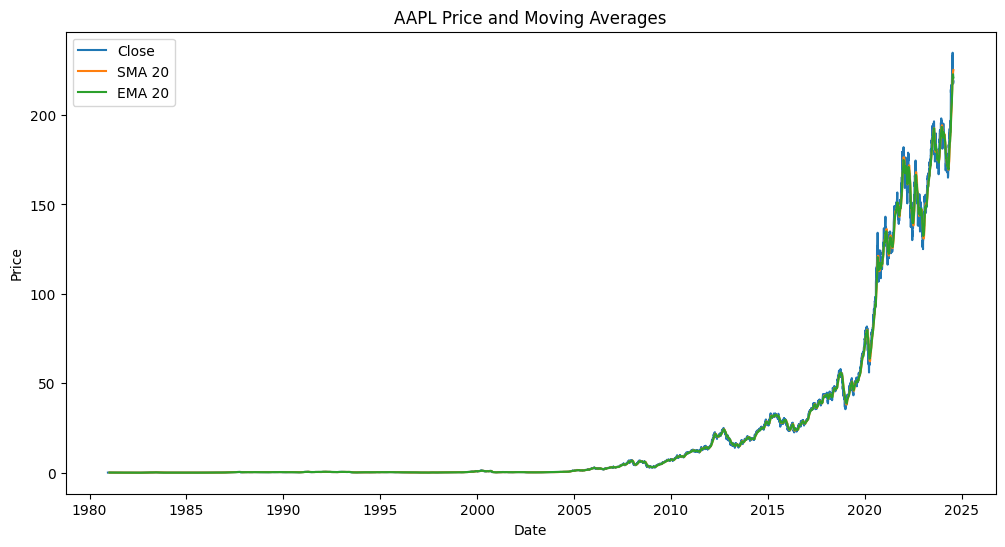

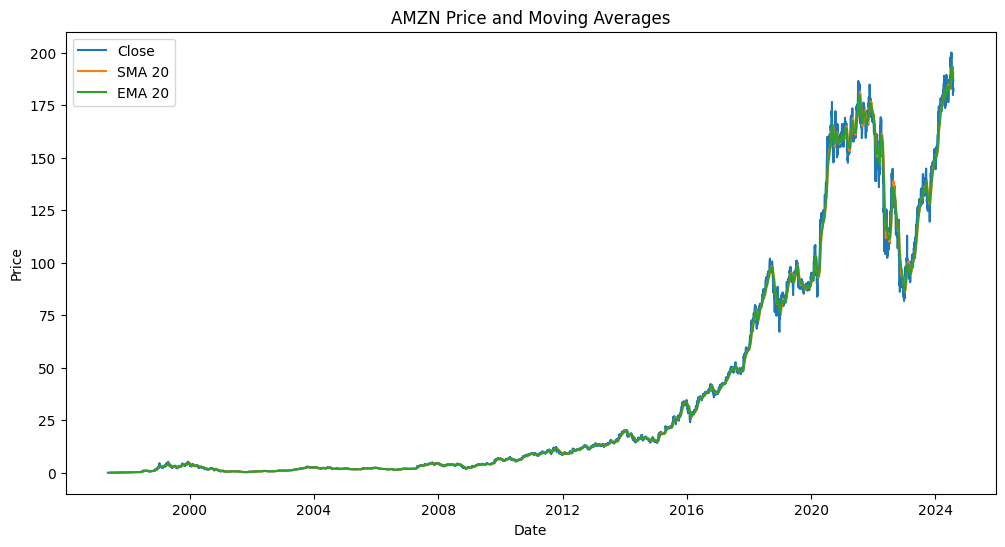

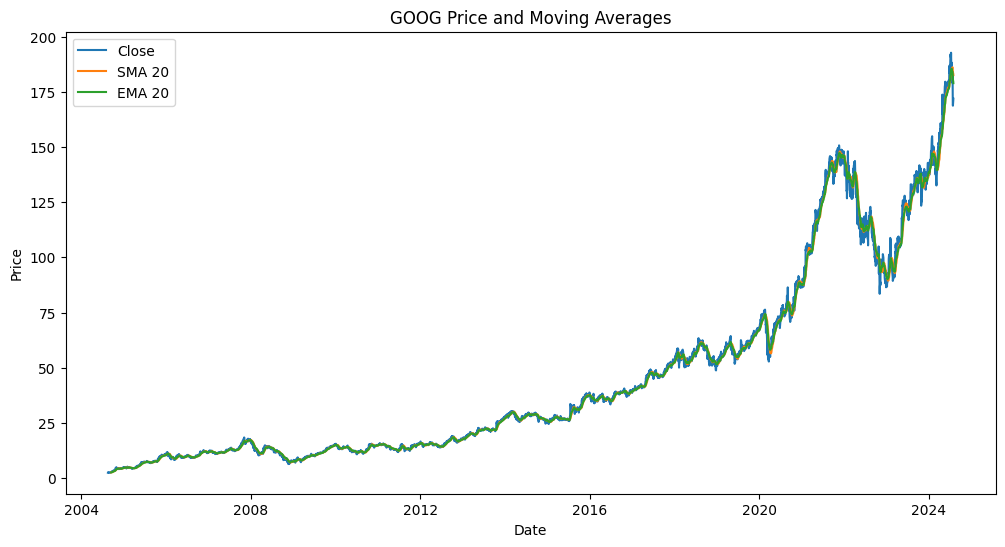

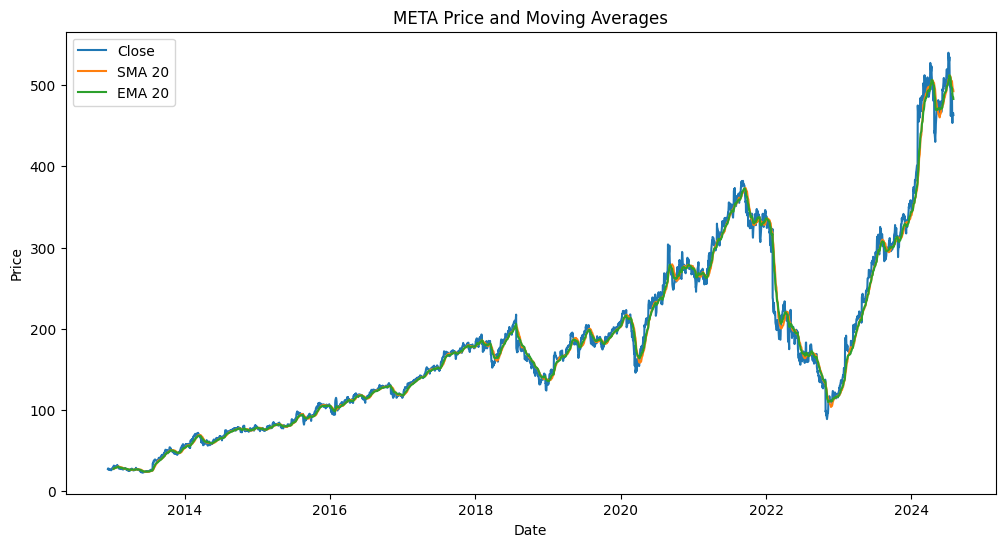

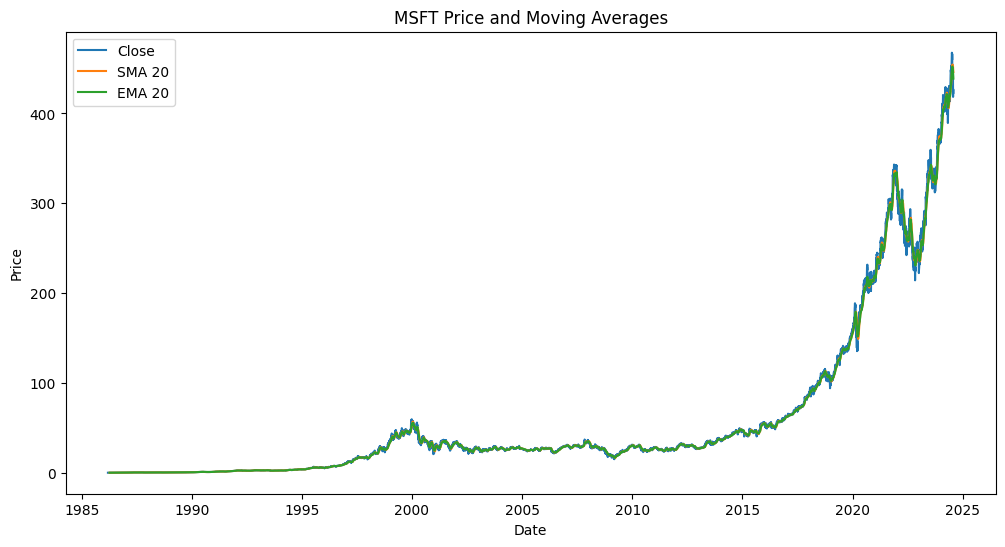

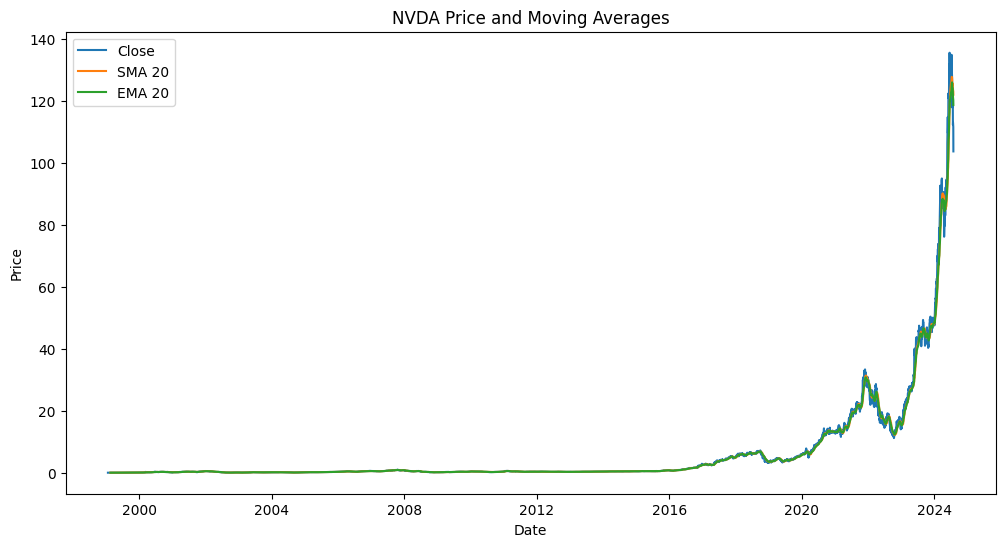

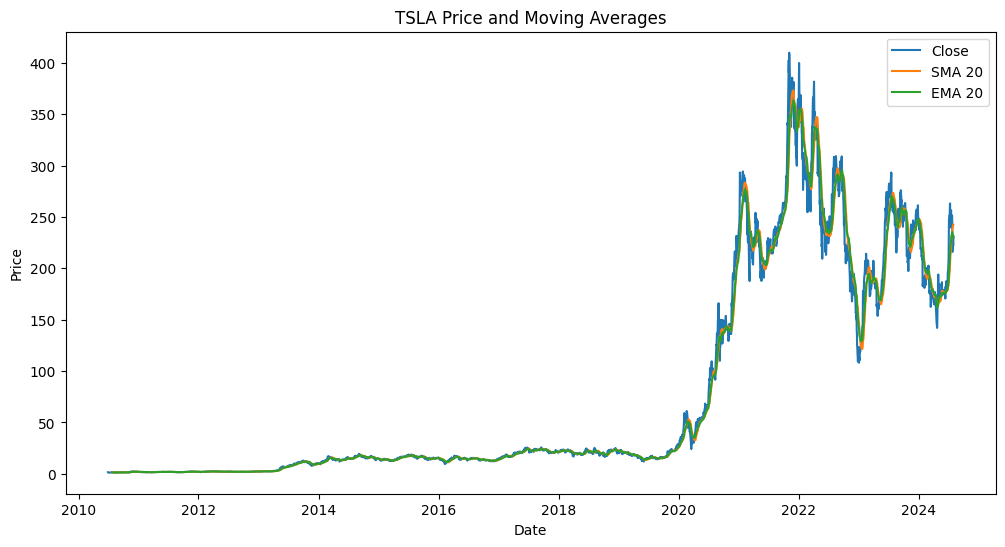

In [6]:
for ticker in tickers:
    df_ticker = all_with_indicators[all_with_indicators['Ticker'] == ticker]
    plt.figure(figsize=(12,6))
    plt.plot(df_ticker['Date'], df_ticker['Close'], label='Close')
    plt.plot(df_ticker['Date'], df_ticker['SMA_20'], label='SMA 20')
    plt.plot(df_ticker['Date'], df_ticker['EMA_20'], label='EMA 20')
    plt.title(f'{ticker} Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

## Visualize RSI and MACD

Plot RSI and MACD for each ticker.

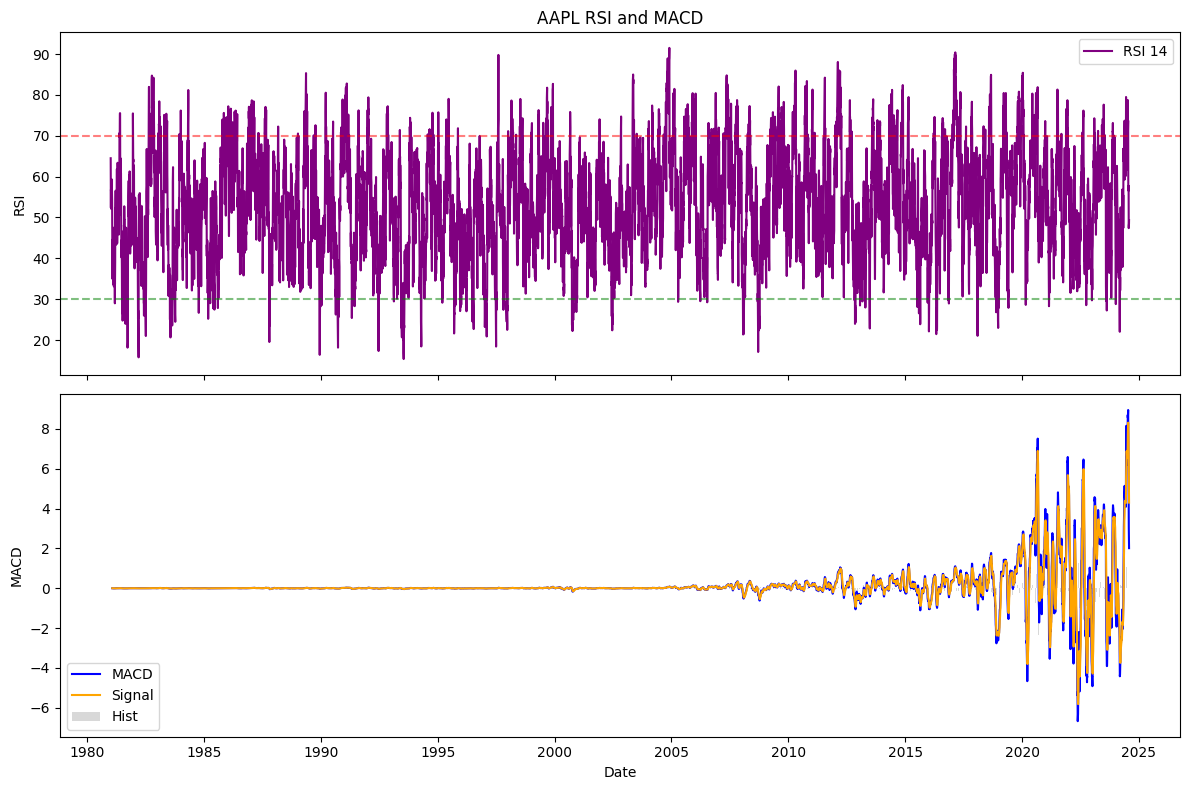

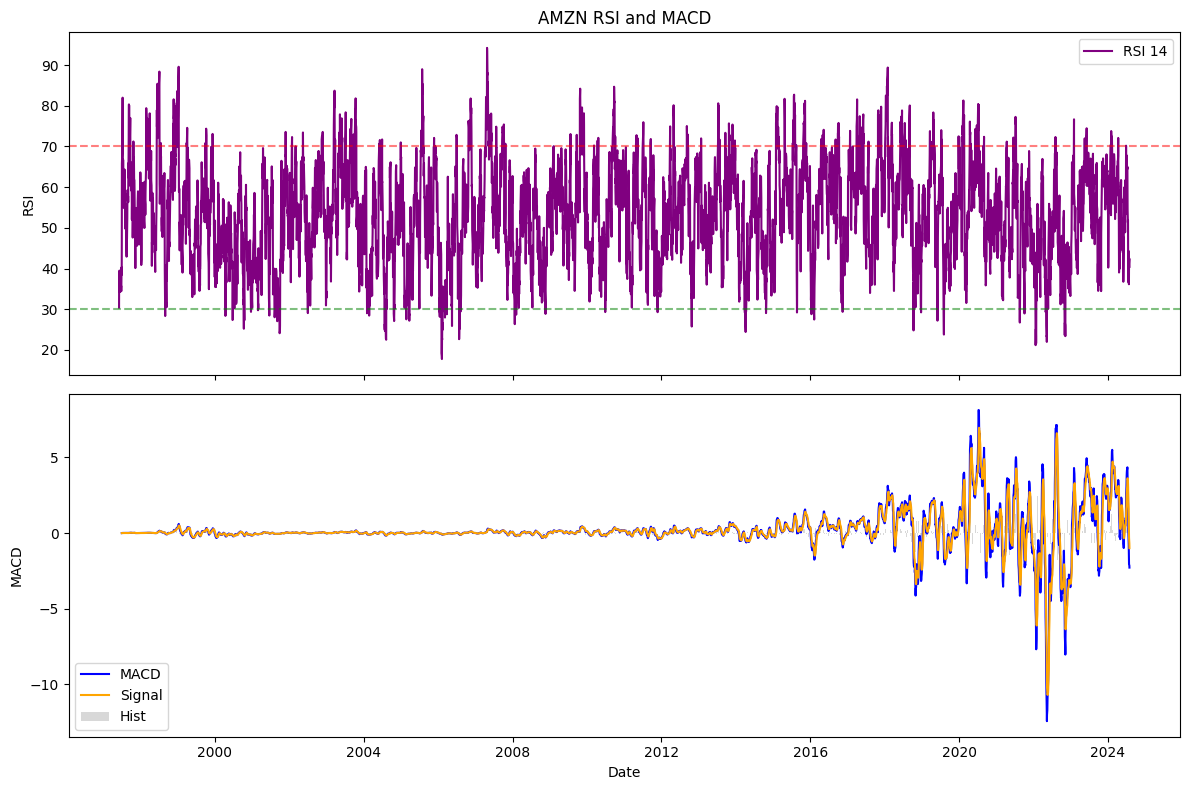

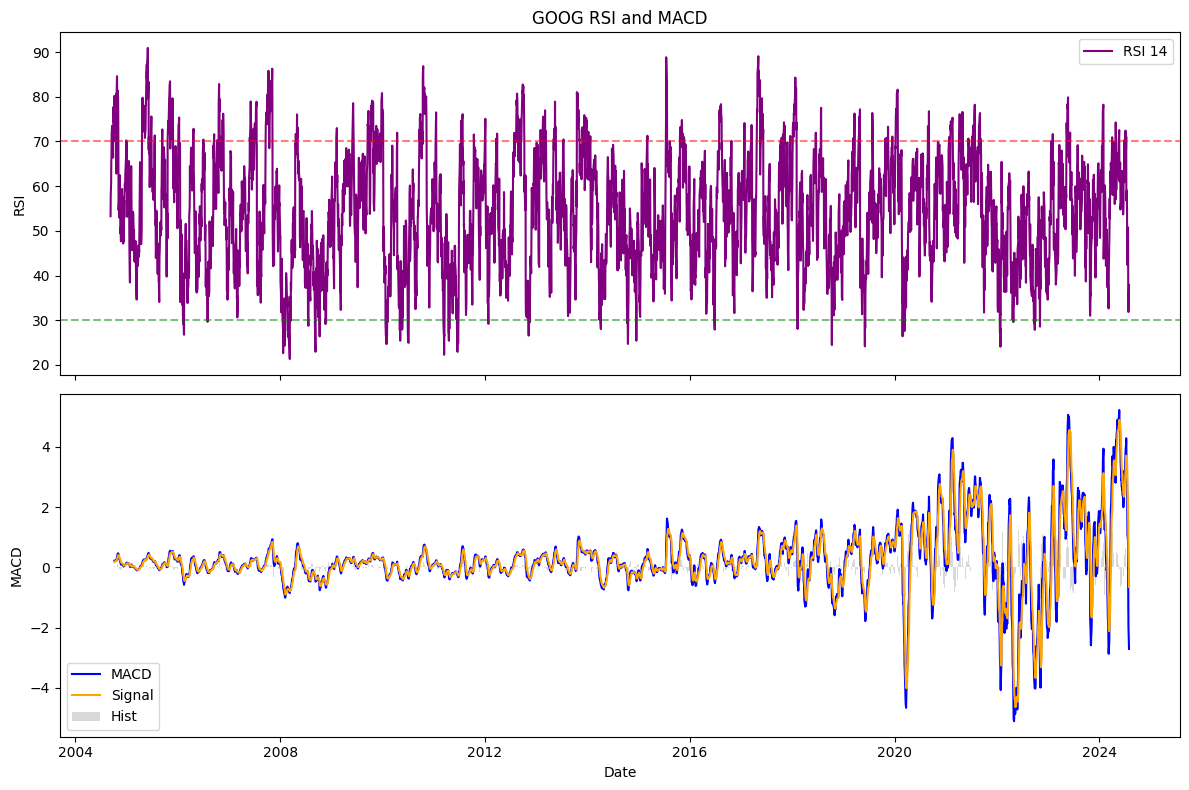

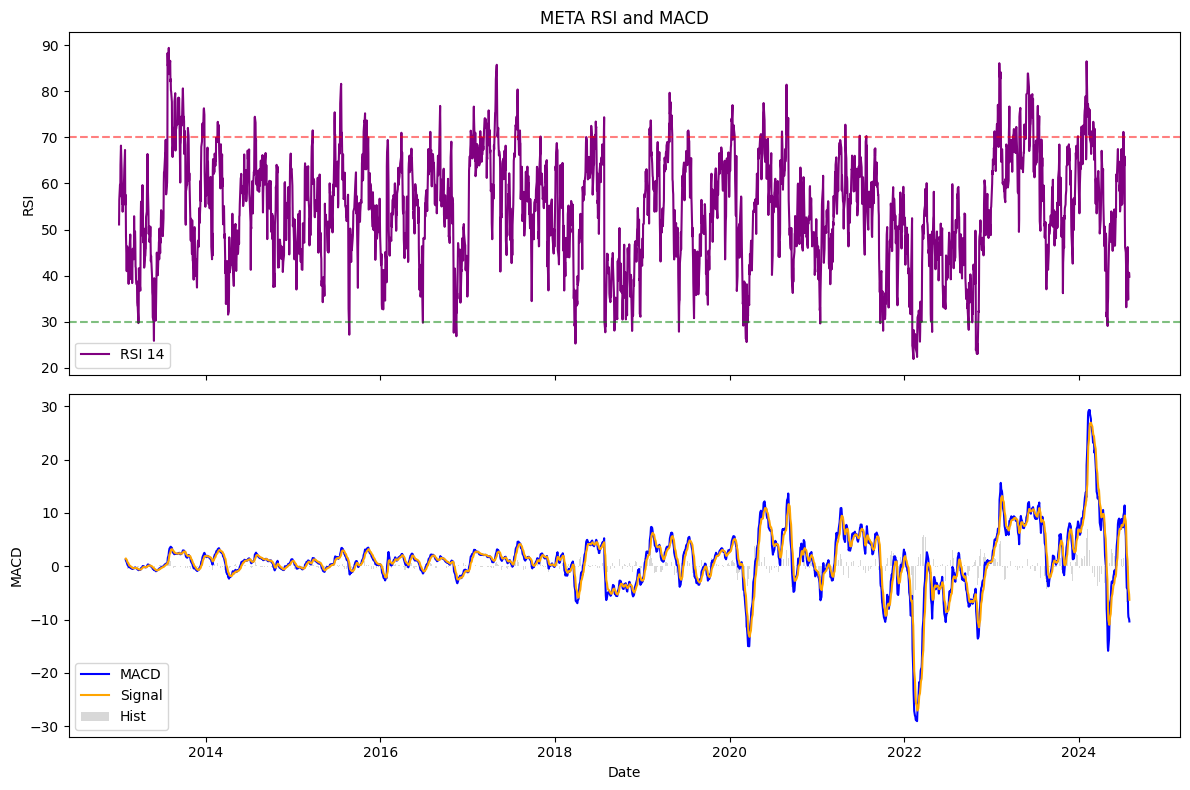

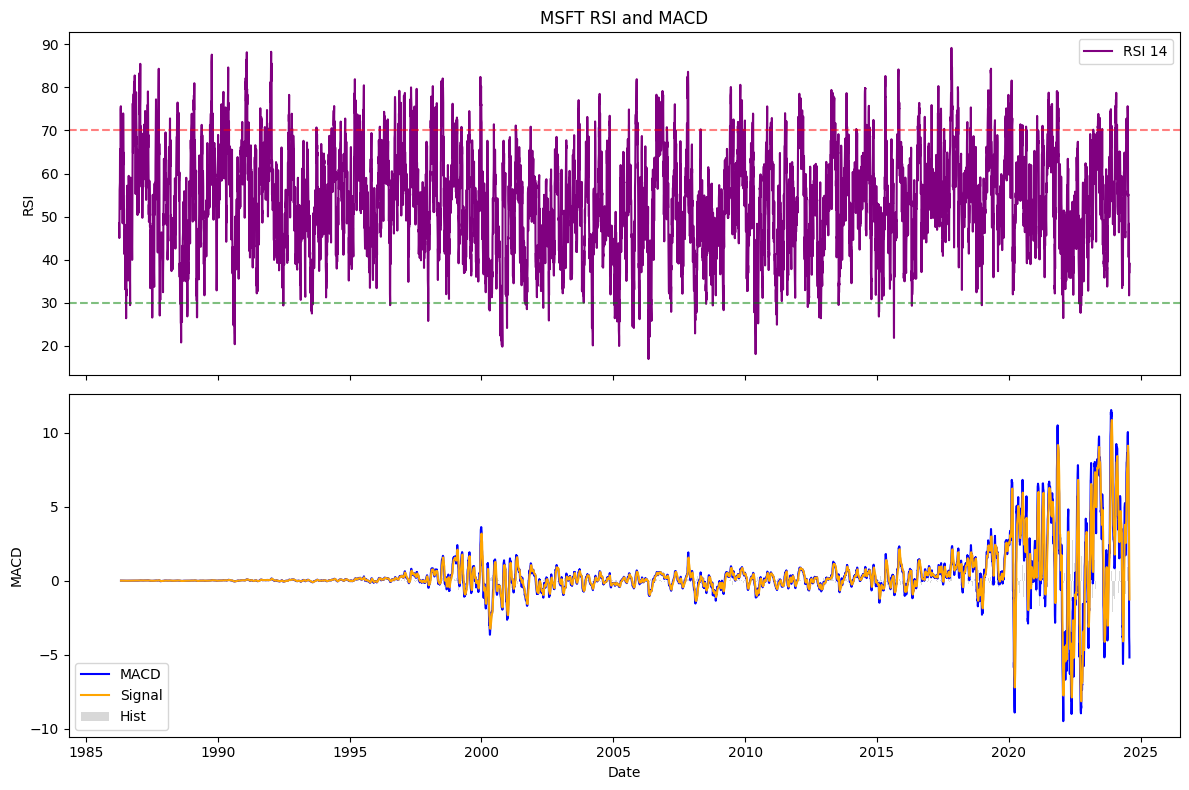

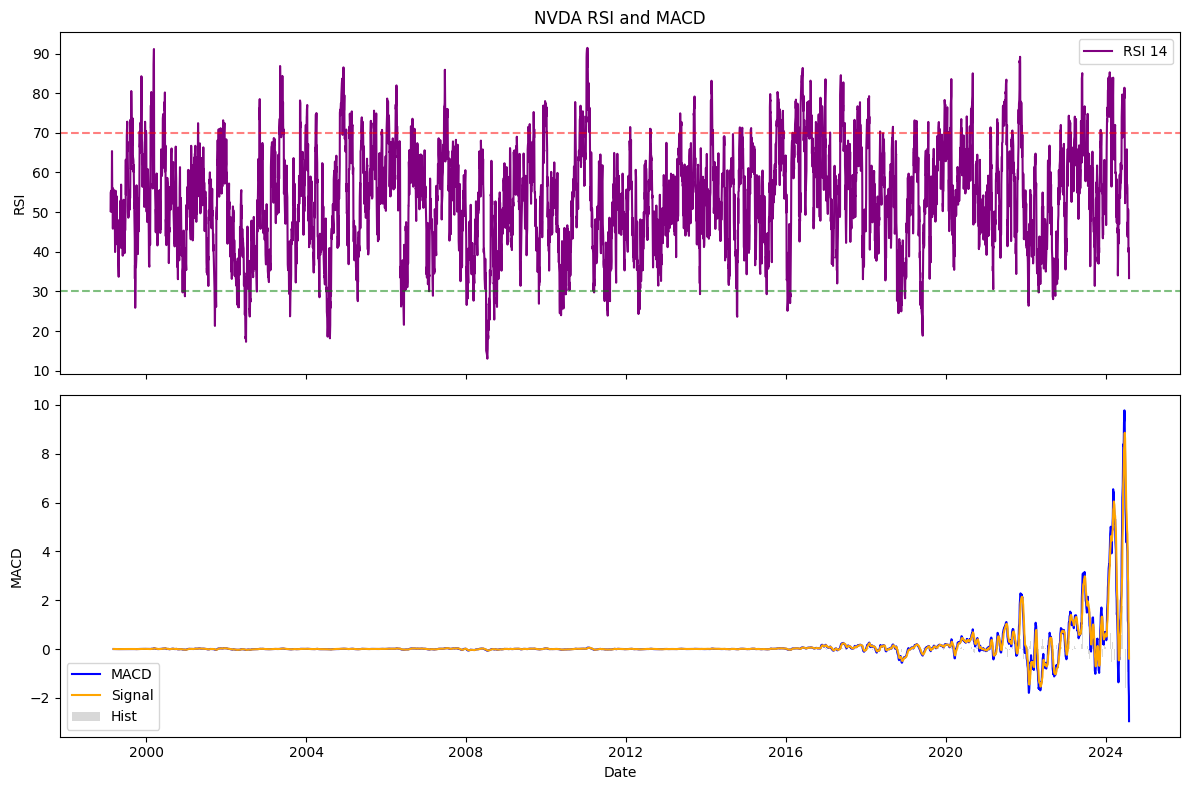

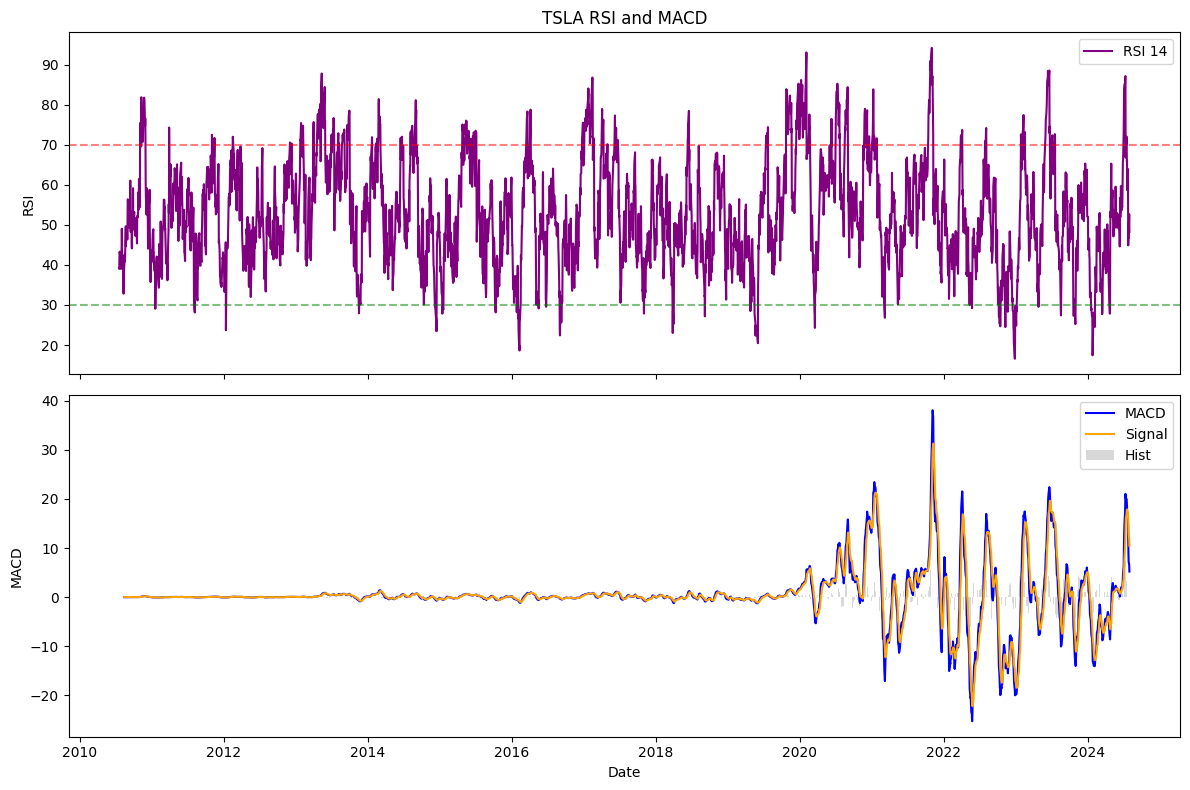

In [7]:
for ticker in tickers:
    df_ticker = all_with_indicators[all_with_indicators['Ticker'] == ticker]
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
    # RSI
    ax1.plot(df_ticker['Date'], df_ticker['RSI_14'], label='RSI 14', color='purple')
    ax1.axhline(70, color='red', linestyle='--', alpha=0.5)
    ax1.axhline(30, color='green', linestyle='--', alpha=0.5)
    ax1.set_ylabel('RSI')
    ax1.set_title(f'{ticker} RSI and MACD')
    ax1.legend()
    # MACD
    ax2.plot(df_ticker['Date'], df_ticker['MACD'], label='MACD', color='blue')
    ax2.plot(df_ticker['Date'], df_ticker['MACD_signal'], label='Signal', color='orange')
    ax2.bar(df_ticker['Date'], df_ticker['MACD_hist'], label='Hist', color='gray', alpha=0.3)
    ax2.set_ylabel('MACD')
    ax2.set_xlabel('Date')
    ax2.legend()
    plt.tight_layout()
    plt.show()

## Calculate Additional Financial Metrics with PyNance

Use PyNance to compute daily returns and volatility for each ticker.

In [8]:
# If not already installed, uncomment the next line:
# !pip install pynance

import pynance as pn

# Calculate daily returns and volatility for each ticker
pynance_metrics = {}

for ticker in tickers:
    df_ticker = all_with_indicators[all_with_indicators['Ticker'] == ticker].copy()
    df_ticker = df_ticker.sort_values('Date')
    # Calculate daily returns
    df_ticker['Return'] = df_ticker['Close'].pct_change()
    # Calculate rolling volatility (standard deviation of returns over 20 days)
    df_ticker['Volatility_20'] = df_ticker['Return'].rolling(window=20).std()
    pynance_metrics[ticker] = df_ticker


# Example: Show AAPL metrics
pynance_metrics['AAPL'][['Date', 'Close', 'Return', 'Volatility_20']].tail()

,Date,Close,Return,Volatility_20
10993,2024-07-24,218.539993,-0.028754,0.017010
10994,2024-07-25,217.490005,-0.004805,0.016555
10995,2024-07-26,217.960007,0.002161,0.016543
10996,2024-07-29,218.240005,0.001285,0.016036
10997,2024-07-30,218.800003,0.002566,0.014710


## Visualize Returns and Volatility

Plot daily returns and rolling volatility for each ticker.

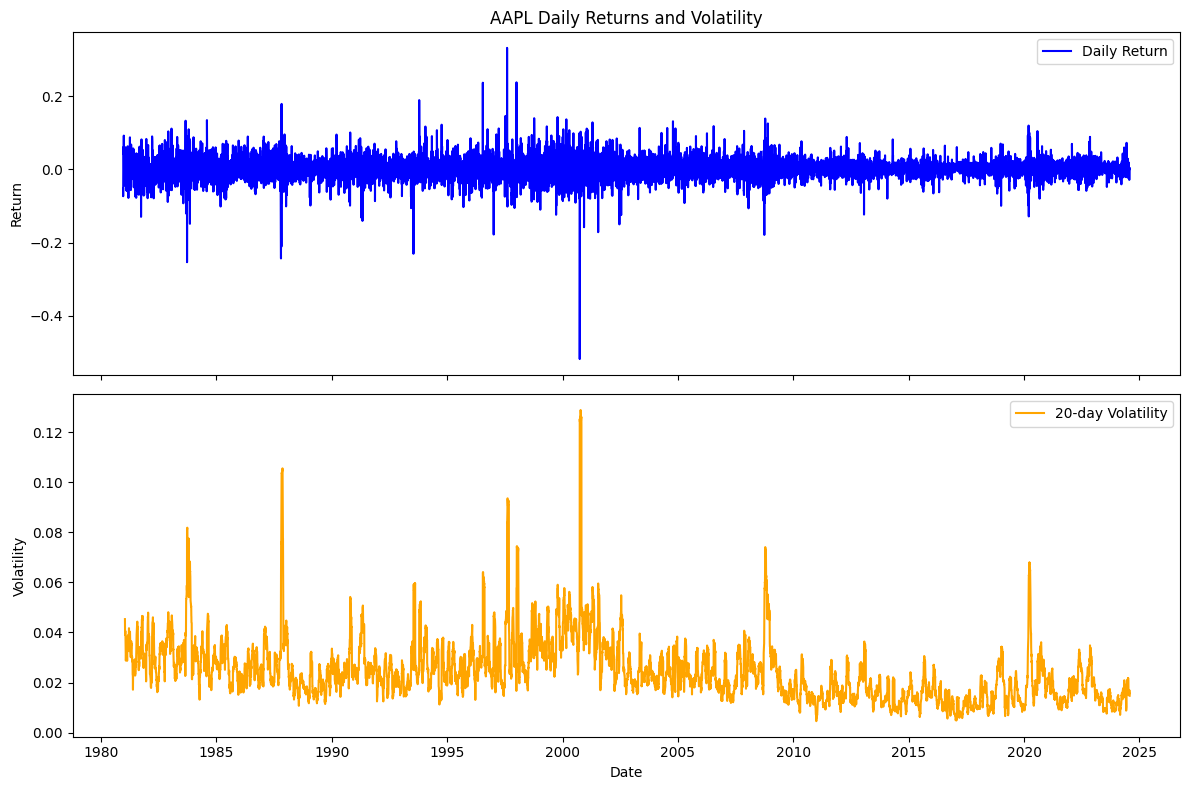

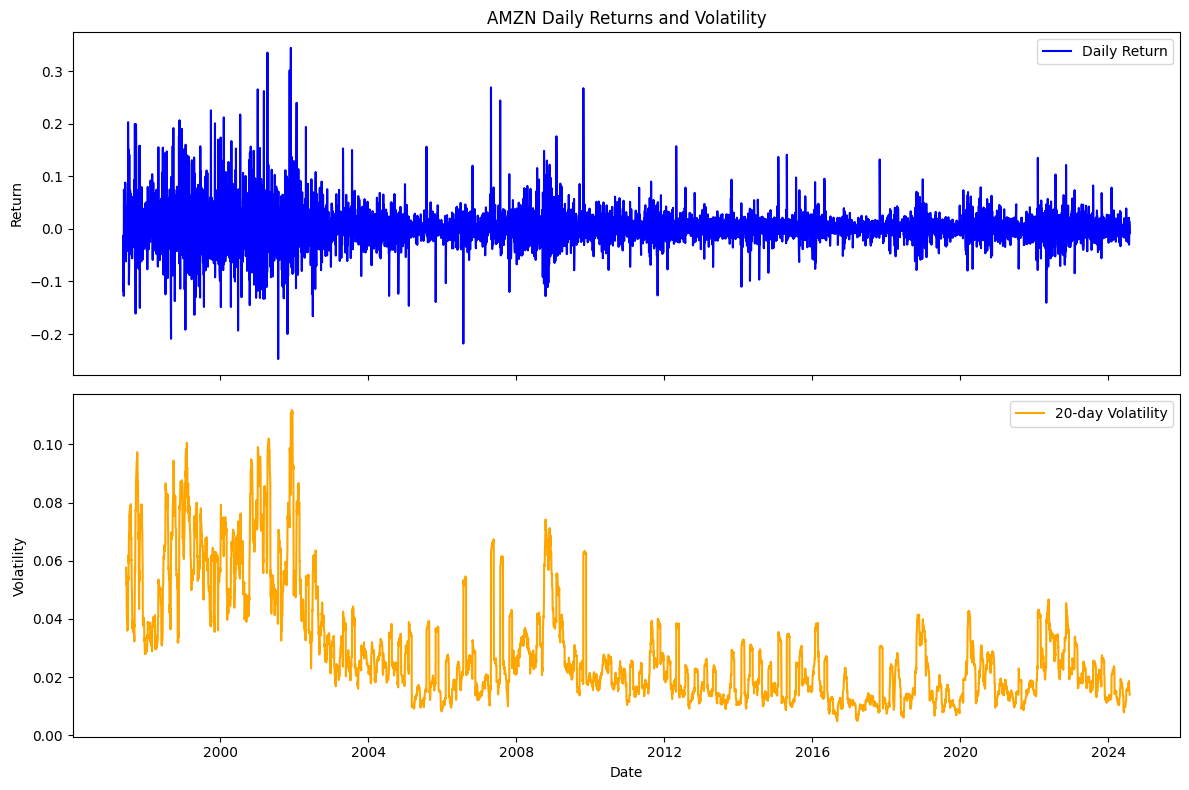

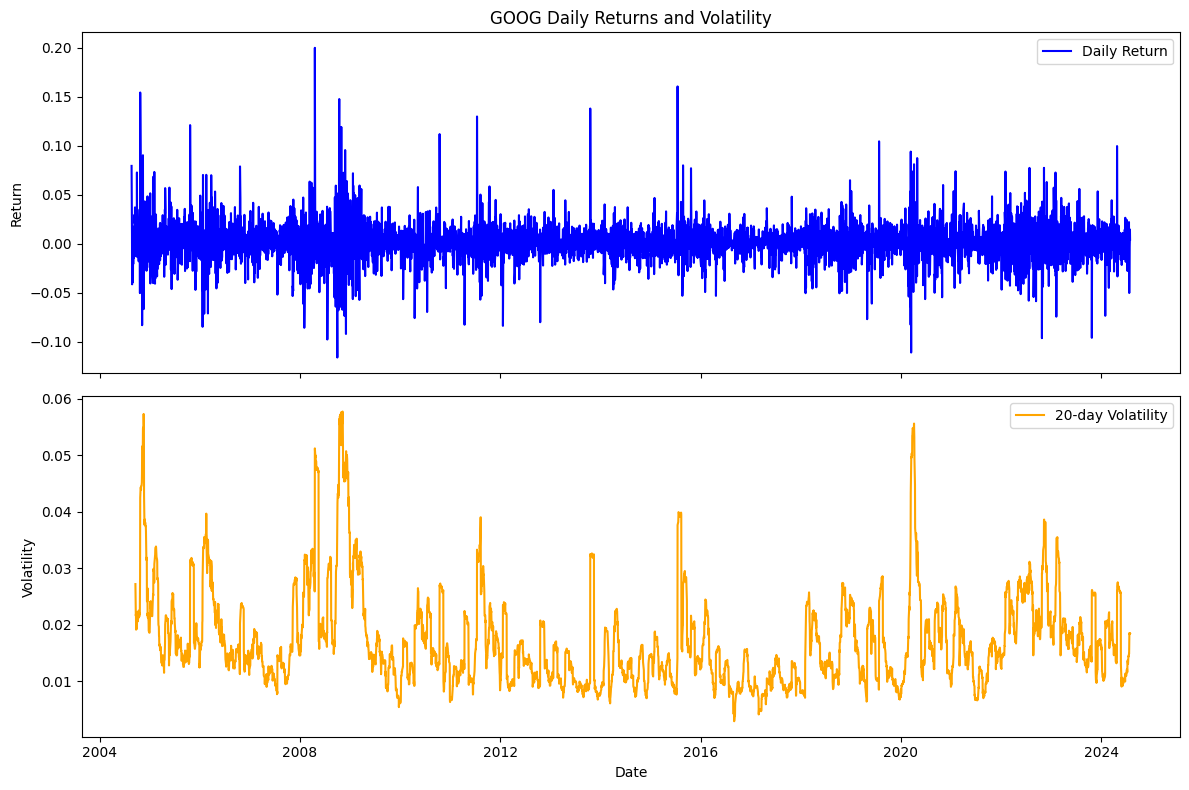

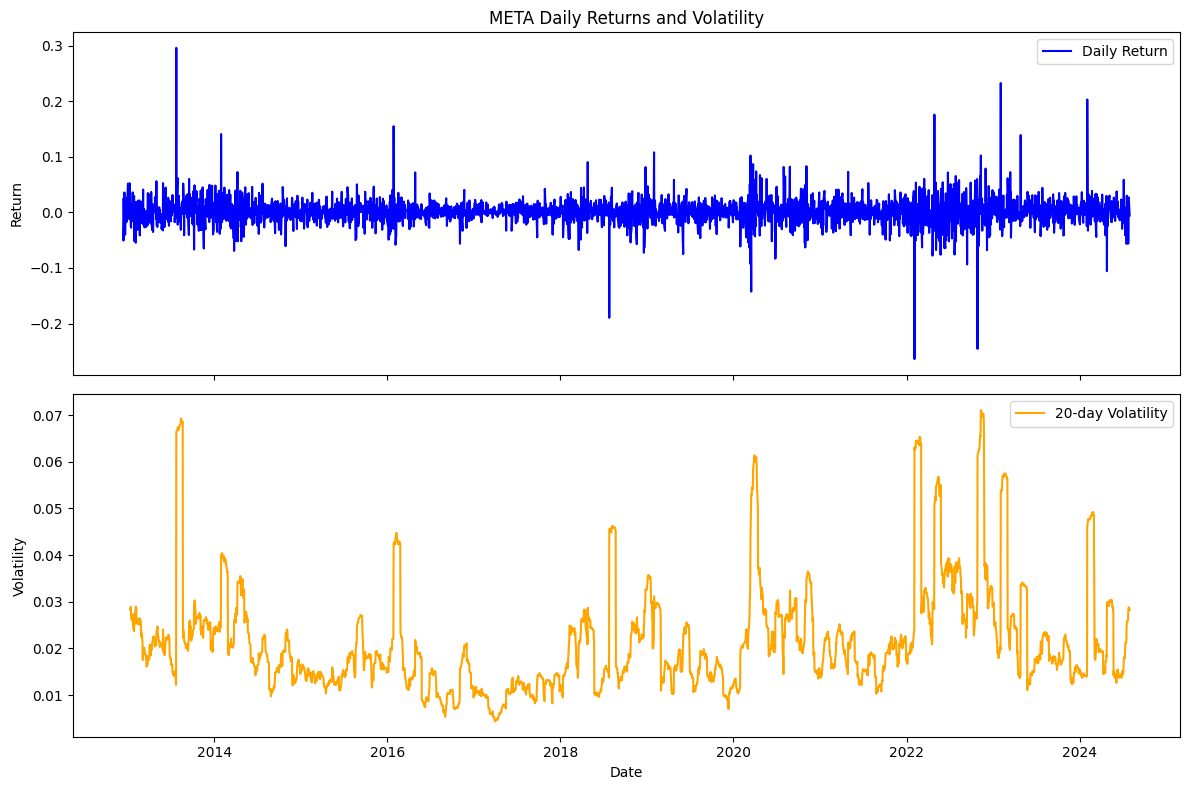

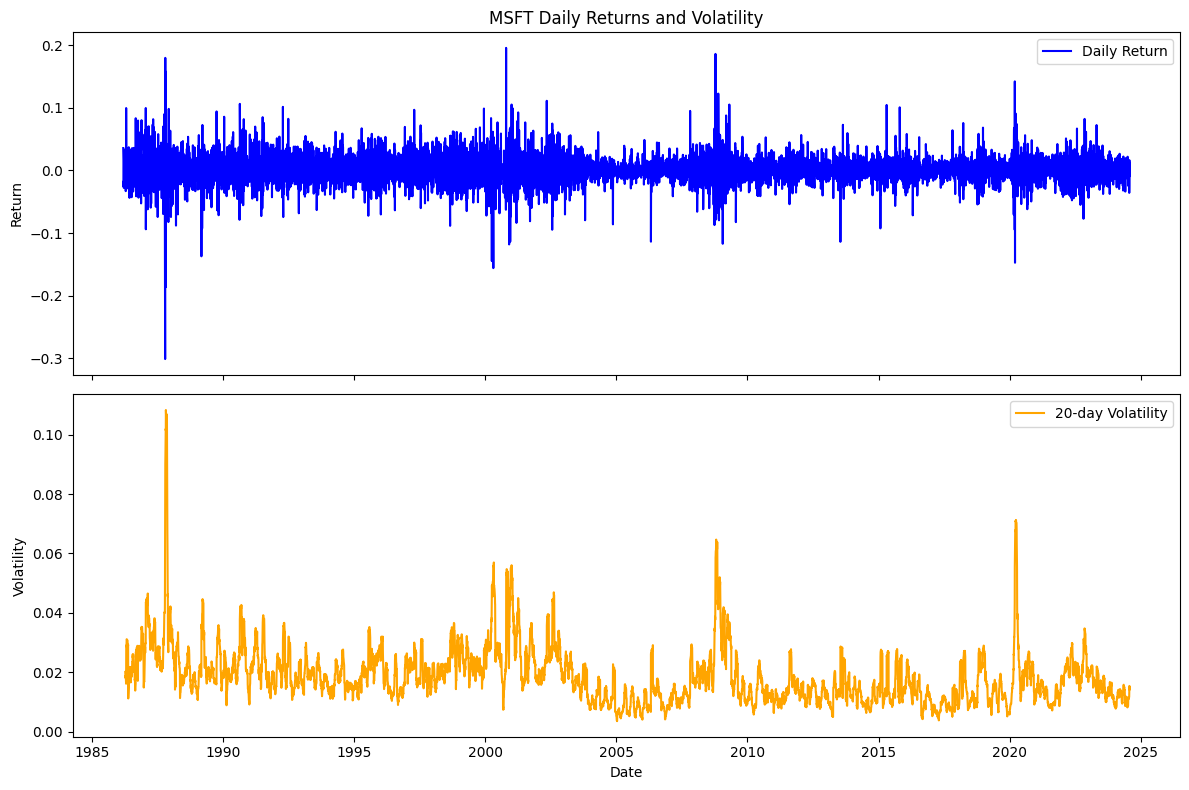

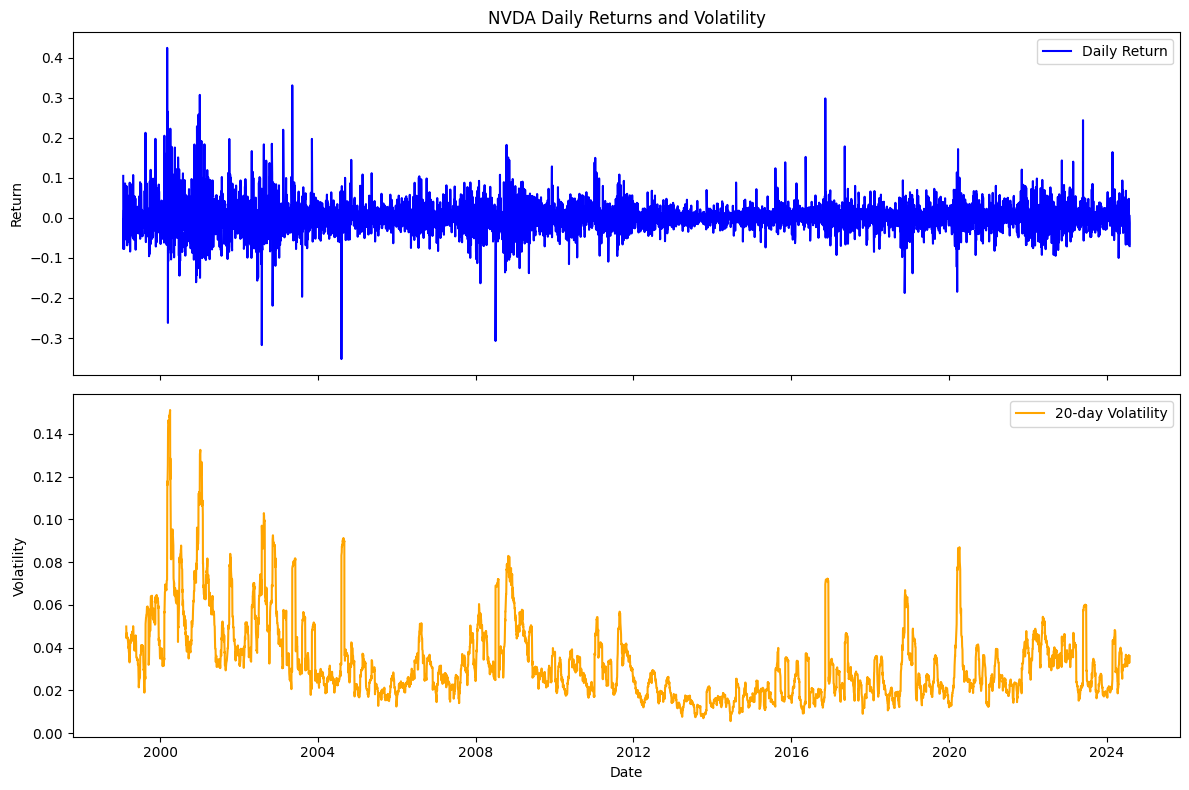

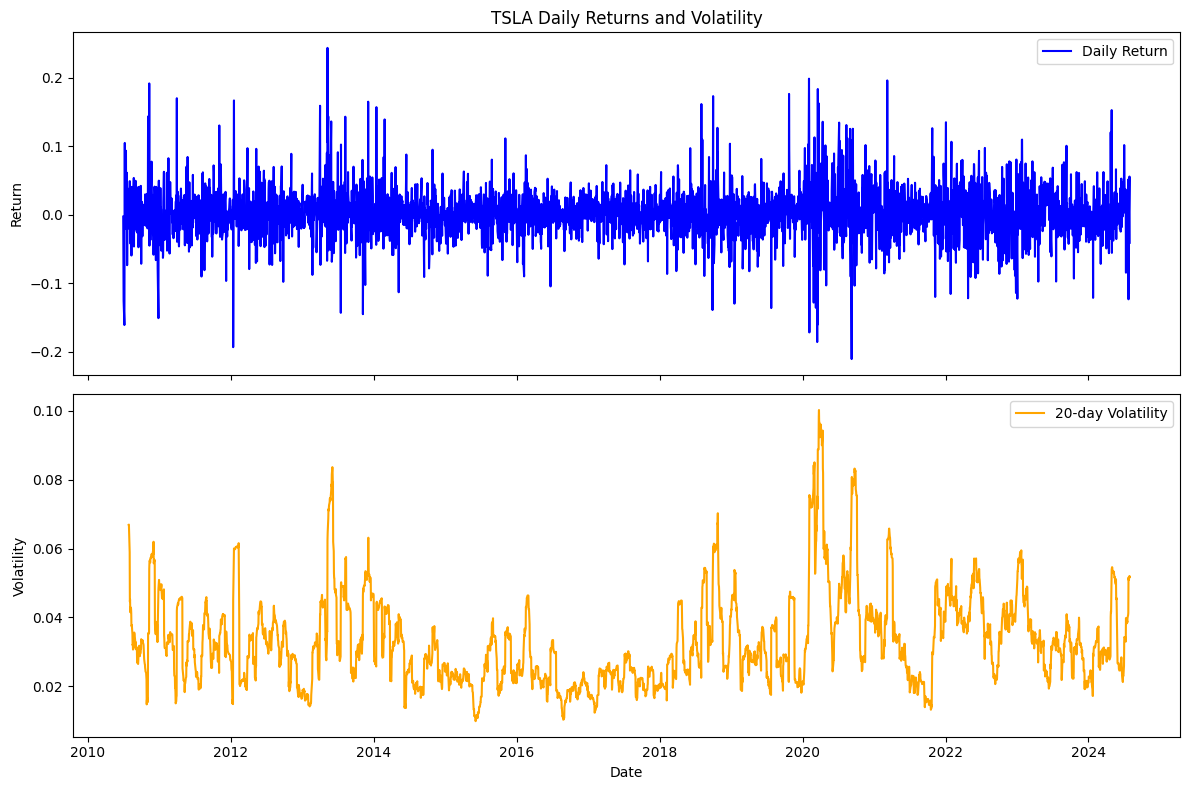

In [9]:
for ticker in tickers:
    df_ticker = pynance_metrics[ticker]
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
    # Daily Returns
    ax1.plot(df_ticker['Date'], df_ticker['Return'], label='Daily Return', color='blue')
    ax1.set_ylabel('Return')
    ax1.set_title(f'{ticker} Daily Returns and Volatility')
    ax1.legend()
    # Volatility
    ax2.plot(df_ticker['Date'], df_ticker['Volatility_20'], label='20-day Volatility', color='orange')
    ax2.set_ylabel('Volatility')
    ax2.set_xlabel('Date')
    ax2.legend()
    plt.tight_layout()
    plt.show()

## PyNance Metrics Summary

- Calculated daily returns and 20-day rolling volatility for each ticker.
- Visualized both metrics to understand risk and return patterns.

## Summary

- This notebook loaded and prepared yfinance data for 7 major stocks.
- Calculated key technical indicators (SMA, EMA, RSI, MACD) using TA-Lib.
- Visualized price, moving averages, RSI, and MACD for each ticker.
- This notebook loaded and prepared yfinance data for 7 major stocks.
- Calculated key technical indicators (SMA, EMA, RSI, MACD) using TA-Lib.
- Used PyNance to compute and visualize daily returns and volatility.
- Visualized price, moving averages, RSI, MACD, returns, and volatility for each ticker.

**Next steps:**
- Integrate with news sentiment data for correlation analysis.